# SVM



### The validation metric is accuracy.

In [2]:
import pandas as pd
import numpy as np

# Import supplementary visualization code visuals.py
import visuals as vs
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('titanic_data.csv')

# Pretty display for notebooks
%matplotlib inline

# # ---  Pre-processing ---

# Extracting passengerid
passengerid = data['PassengerId']

# Removing data from training
data = data.drop(columns=['Ticket', 'Name', 'Cabin'])

# Log-transform Fare
skewed = ['Fare']
data = pd.DataFrame(data = data)
data[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Replacing: Male = 0 and Female = 1
gender = {"male": 0, "female": 1}
data = data.replace({"Sex":gender})

# Replaces: Embarked C = 0, Q = 1, S = 2
gate = {"C":0, "Q":1, "S":2}
data = data.replace({"Embarked":gate})

# Min Max Scaler (Normalization)
scaler = MinMaxScaler()
numerical = ['Fare', 'Pclass', 'Embarked', 'Parch', 'SibSp']
data[numerical] = scaler.fit_transform(data[numerical])

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


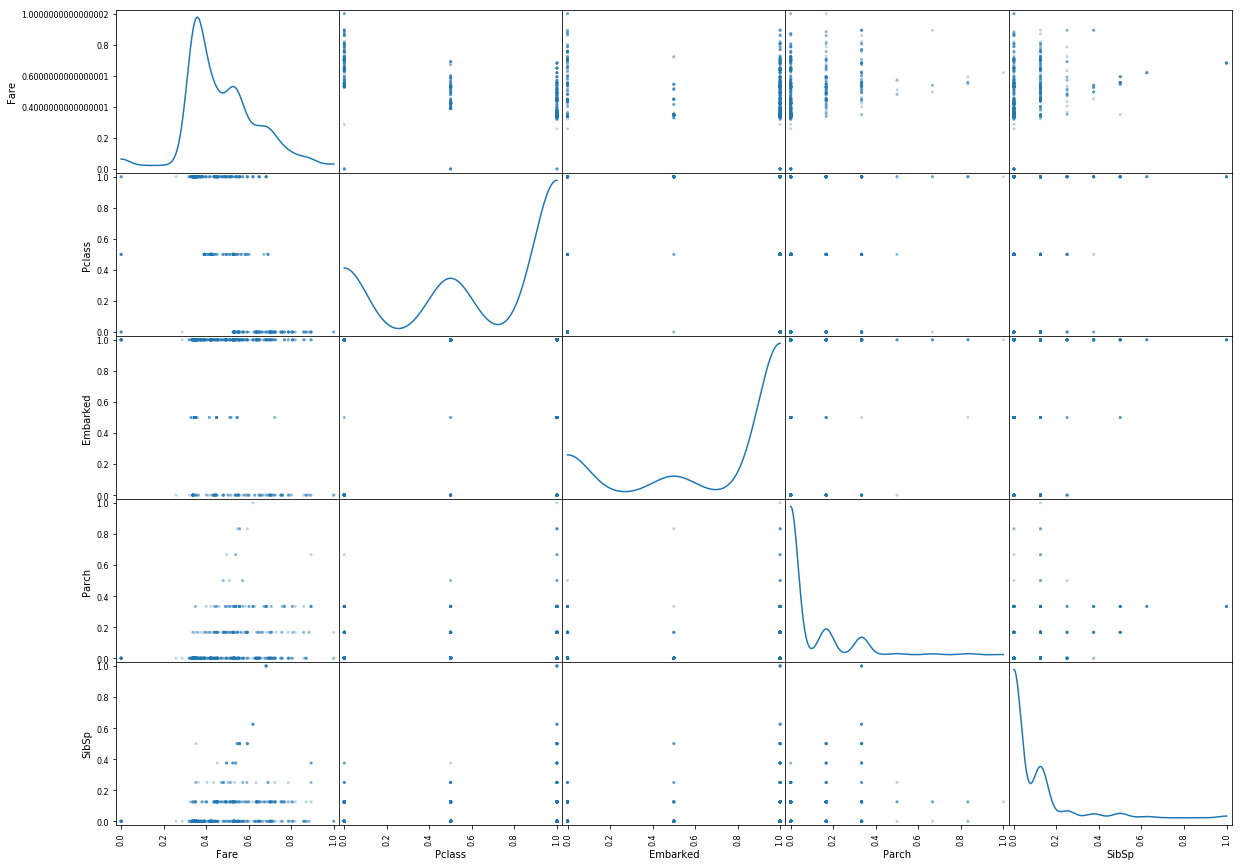

In [3]:
from pandas.plotting import scatter_matrix
import seaborn as sns

scatter_matrix(data[numerical], alpha = 0.3, figsize = (20, 15), diagonal = 'kde')
plt.show()

### Predict the Age of the passenger in order to fill the NaN values more accurately


#### Preparing the data for predicting the Age

In [4]:
# Getting only data where the Age is not NaN
not_nan_data = data[data['Age'].notna()]

# Removing NaN values from other columns
not_nan_data = not_nan_data.fillna(0)

# Extracting features
features_age_training = not_nan_data.drop(columns = ['Age', 'PassengerId'])

# Extracting the Age
age_data = not_nan_data['Age']

#### Creating the model to predict the Age

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Model implementation
age_predictor = DecisionTreeRegressor(max_depth = 15, min_samples_split = 5)
age_predictor.fit(features_age_training, age_data)
age_pred = age_predictor.predict(features_age_training)

# Validating the model with R2 score
scr = r2_score(age_data, age_pred)
print("R2 Score for the Age predictor is: {}".format(scr))

R2 Score for the Age predictor is: 0.6981990097872564


#### Predicting the missing data of Age

In [6]:
# Getting only data where the Age is NaN
nan_data = data[data['Age'].isna()]

# Removing NaN values from other columns
nan_data = nan_data.fillna(0)

# Extracting the passenger ids that have nan age
passengerid_nan_age = nan_data['PassengerId']

# Extracting features
features_nan_data = nan_data.drop(columns = ['Age', 'PassengerId'])
age_prediction = age_predictor.predict(features_nan_data)

#### Filling out the NaN data from the Age with the predicted values 

In [7]:
# Creating a np array with Id and Age of from both origin and predicted data
origin_age = np.array(data[['PassengerId', 'Age']])
pred_age = np.transpose(np.array([passengerid_nan_age, age_prediction]))

# Creating a copy of age origin age data to modify it with the final values 
final_age = origin_age

# Creating a final age data
for i in range(0, len(origin_age)):
    for j in range(0, len(pred_age)):
        if origin_age[i, 0] == pred_age[j, 0]:
            final_age[i, 1] = pred_age[j, 1]

final_data = data.copy()

# Extracting the ages into the final_data Datraframe
final_data['Age'] = final_age[:, 1]

### Creating the model to predict if the passangers survived

In [10]:
# Extracting features and survived_data
features_final = final_data.drop(columns = ['Survived', 'PassengerId'])
survived_data = final_data['Survived']

# -- Final Pre-Processing

# Removing NaN from Embarked Column - Only 3 repetitions
final_data = final_data.fillna(0)

# Log-transform Fare
skewed = ['Age']
features_final = pd.DataFrame(data = features_final)
features_final[skewed] = features_final[skewed].apply(lambda x: np.log(x + 1))

# Min Max Scaler (Normalization)
scaler = MinMaxScaler()
numerical = ['Age']
features_final = pd.DataFrame(data = features_final)
features_final[numerical] = scaler.fit_transform(features_final[numerical])

features_final.fillna(0)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0,0.688670,0.125,0.000000,0.338125,1.0
1,0.0,1,0.819257,0.125,0.000000,0.685892,0.0
2,1.0,1,0.728321,0.000,0.000000,0.350727,1.0
3,0.0,1,0.799463,0.125,0.000000,0.639463,1.0
4,1.0,0,0.799463,0.000,0.000000,0.352955,1.0
5,1.0,0,0.785328,0.000,0.000000,0.360026,0.5
6,0.0,0,0.904269,0.000,0.000000,0.635755,1.0
7,1.0,0,0.184964,0.375,0.166667,0.495832,1.0
8,1.0,1,0.737315,0.000,0.333333,0.399934,1.0
9,0.5,1,0.582966,0.125,0.000000,0.550603,0.0


### PCA Visualization

In [11]:
from sklearn.decomposition import PCA

# The number of components must be min(n_samples, n_features)
n_components = 2

pca = PCA(n_components = n_components)
pca.fit(features_final)

print(pca.explained_variance_ratio_)

[0.39814709 0.28069752]


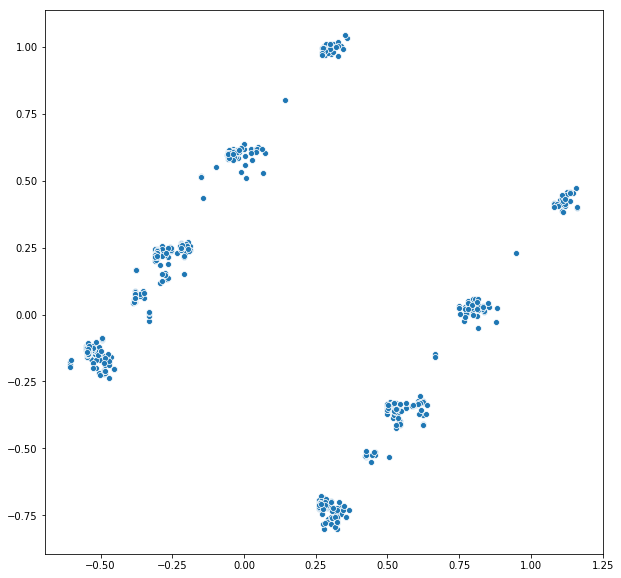

In [18]:
reduced_data = pca.transform(features_final)

plt.figure(figsize = (10, 10))
sns.scatterplot(reduced_data[:,0], reduced_data[:, 1])
plt.show()

In [20]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters = 2)
# kmeans_pred = kmeans.fit_predict(reduced_data)

In [21]:
# from sklearn.metrics import adjusted_rand_score

# kmeans_scr = adjusted_rand_score(survived_data, kmeans_pred)

# print("Kmeans ARI Score is {}".format(kmeans_scr))

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(reduced_data, survived_data,
                                                    test_size = 0.2, random_state = 33 )

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scr = accuracy_score(y_test, y_pred)
print("Accuracy score: {}".format(scr))


Accuracy score: 0.8212290502793296


/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ShuffleSplit

cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 33)
scorer = make_scorer(accuracy_score)
parameters = {'C':[1e-3, 1e-2, 1e-1, 1, 1e1], 'degree': [1, 2, 3]}
model = SVC()

grid_obj = GridSearchCV(model, parameters, scoring = scorer, cv = cv_sets)
grid_fit = grid_obj.fit(X_train, y_train)

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
best_clf = grid_fit.best_estimator_

y_pred_train = best_clf.predict(X_train)
train_scr = accuracy_score(y_train, y_pred_train)
y_pred_test = best_clf.predict(X_test)
test_scr = accuracy_score(y_test, y_pred)

print("Train accuracy score: {}".format(train_scr))
print("Test accuracy score: {}".format(test_scr))

Train accuracy score: 0.8089887640449438
Test accuracy score: 0.8212290502793296
